In [ ]:
#| hide
from animate_arrays.animate import animate_lines

# animate_arrays

> Module with functions to animate data stored in 2D+3D arrays

This module wraps some setup scripts and functions to make Matplotlib's animations a little simpler to interface with. The starting point here becomes creating data with 

## Install

```sh
pip install animate_arrays
```

## How to use 2D arrays

### Import libraries

The `animate_arrays` functions work in Jupyter notebooks. You'll need to import some of the libraries to build some arrays, plots, and animations as such,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

I prefer to use the [fivethirtyeight](https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html) style sheet, but you can use any style.

In [ ]:
plt.style.use('fivethirtyeight')

Then, import the `animate_lines` function from the `animate_arrays.animate` module.

In [ ]:
from animate_arrays.animate import animate_lines

### Build arrays and watch them move

With the libraries imported, I build 2 arrays, `X` and `Y` where each column is $\times 3~(x,~y)$ coordinates that define two rotating arms. 

- Arm 1 rotates once around the origin
- Arm 2 is connected to arm 1 and rotates twice

In [ ]:
a = np.linspace(0, 2*np.pi, 100)

x1 = np.cos(a)
y1 = np.sin(a)

x2 = np.cos(2*a)
y2 = np.sin(2*a)
X = np.array([np.zeros(len(a)), x1, x1+x2])
Y = np.array([np.zeros(len(a)), y1, y1+y2])

In [ ]:
a = animate_lines(X, Y)
HTML(a.to_html5_video())

The animation does not have equal axes, so the arms appear to be changing lengths as the rotations occur. 

The `setup_fig_function` option allows you to define a custom plot setup. Here, I name it `fig_setup`

In [ ]:
def fig_setup():
    fig, ax = plt.subplots()
    
    ax.plot(X[2, :], Y[2, :], '--')
    ax.axis('equal')
    return fig, ax

The `setup_fig_function` should not take any arguments. I used it to set up 2 new display additions, 
1. plot the path of arm 2's end so we can see where its been and where its going on the dashed line
2. equal axes with `ax.axis('equal')`

Below, I try running the function and looking at the resulting static figure for the animation

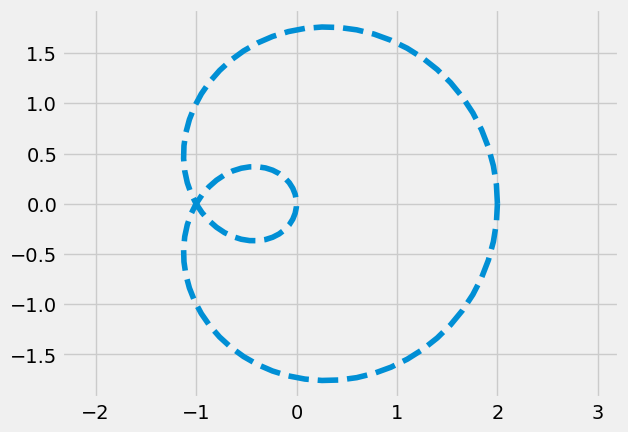

In [ ]:
fig, ax = fig_setup()


In [ ]:
a = animate_lines(X, Y, setup_fig_function= fig_setup)

In [ ]:
HTML(a.to_html5_video())

## How to use 3D arrays

In the first example, we used a 2D array where each column defined the line for a point in time. The `animate_lines` function can also plot multiple lines in each frame. Here, we'll add another set of rotating arms. 

In [ ]:
a = np.linspace(0, 2*np.pi, 100)

x1 = np.cos(a)
y1 = np.sin(a)

x2 = np.cos(2*a)
y2 = np.sin(2*a)

x3 = np.cos(2*a)
y3 = np.sin(2*a)

x4 = np.cos(3*a)
y4 = np.sin(3*a)

X = np.zeros((3, 2, len(a)))
Y = np.zeros((3, 2, len(a)))

X[:, 0, :] = np.array([np.zeros(len(a)), x1, x1+x2])
X[:, 1, :] = np.array([np.zeros(len(a)), x3, x3+x4])

Y[:, 0, :] = np.array([np.zeros(len(a)), y1, y1+y2])
Y[:, 1, :] = np.array([np.zeros(len(a)), y3, y3+y4])

In [ ]:
def fig_setup():
    fig, ax = plt.subplots()
    
    ax.plot(X[2, 0, :], Y[2, 0, :], '--')
    ax.plot(X[2, 1, :], Y[2, 1, :], '--')
    ax.axis('equal')
    return fig, ax

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

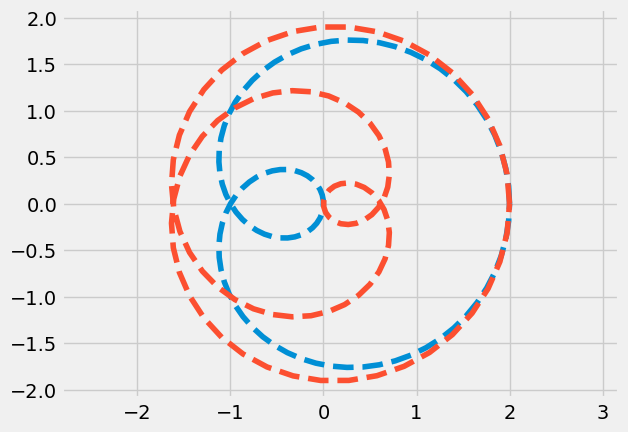

In [ ]:
fig_setup()

In [ ]:
a2 = animate_lines(X, Y, setup_fig_function=fig_setup)
HTML(a2.to_html5_video())